In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Dataset/Weather_dataset.csv", index_col='time')
data.head()

,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction
time,,,,,,,,,,,,,,,
2000-01-01T00:00,-0.1,97,-0.5,0.0,0.0,0.0,1024.2,1019.3,87,76,3,56,0.02,5.9,169
2000-01-01T01:00,-0.2,97,-0.7,0.0,0.0,0.0,1024.4,1019.5,89,79,1,58,0.02,5.8,173
2000-01-01T02:00,-0.1,96,-0.6,0.0,0.0,0.0,1024.5,1019.6,100,89,9,80,0.02,6.1,180
2000-01-01T03:00,-0.2,96,-0.7,0.0,0.0,0.0,1024.2,1019.3,100,92,34,92,0.02,6.8,183
2000-01-01T04:00,-0.2,96,-0.8,0.0,0.0,0.0,1024.0,1019.1,100,76,51,98,0.02,6.8,183


In [4]:
data.index = pd.to_datetime(data.index, format="%Y-%m-%dT%H:%M")
data.head()

,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction
time,,,,,,,,,,,,,,,
2000-01-01 00:00:00,-0.1,97,-0.5,0.0,0.0,0.0,1024.2,1019.3,87,76,3,56,0.02,5.9,169
2000-01-01 01:00:00,-0.2,97,-0.7,0.0,0.0,0.0,1024.4,1019.5,89,79,1,58,0.02,5.8,173
2000-01-01 02:00:00,-0.1,96,-0.6,0.0,0.0,0.0,1024.5,1019.6,100,89,9,80,0.02,6.1,180
2000-01-01 03:00:00,-0.2,96,-0.7,0.0,0.0,0.0,1024.2,1019.3,100,92,34,92,0.02,6.8,183
2000-01-01 04:00:00,-0.2,96,-0.8,0.0,0.0,0.0,1024.0,1019.1,100,76,51,98,0.02,6.8,183


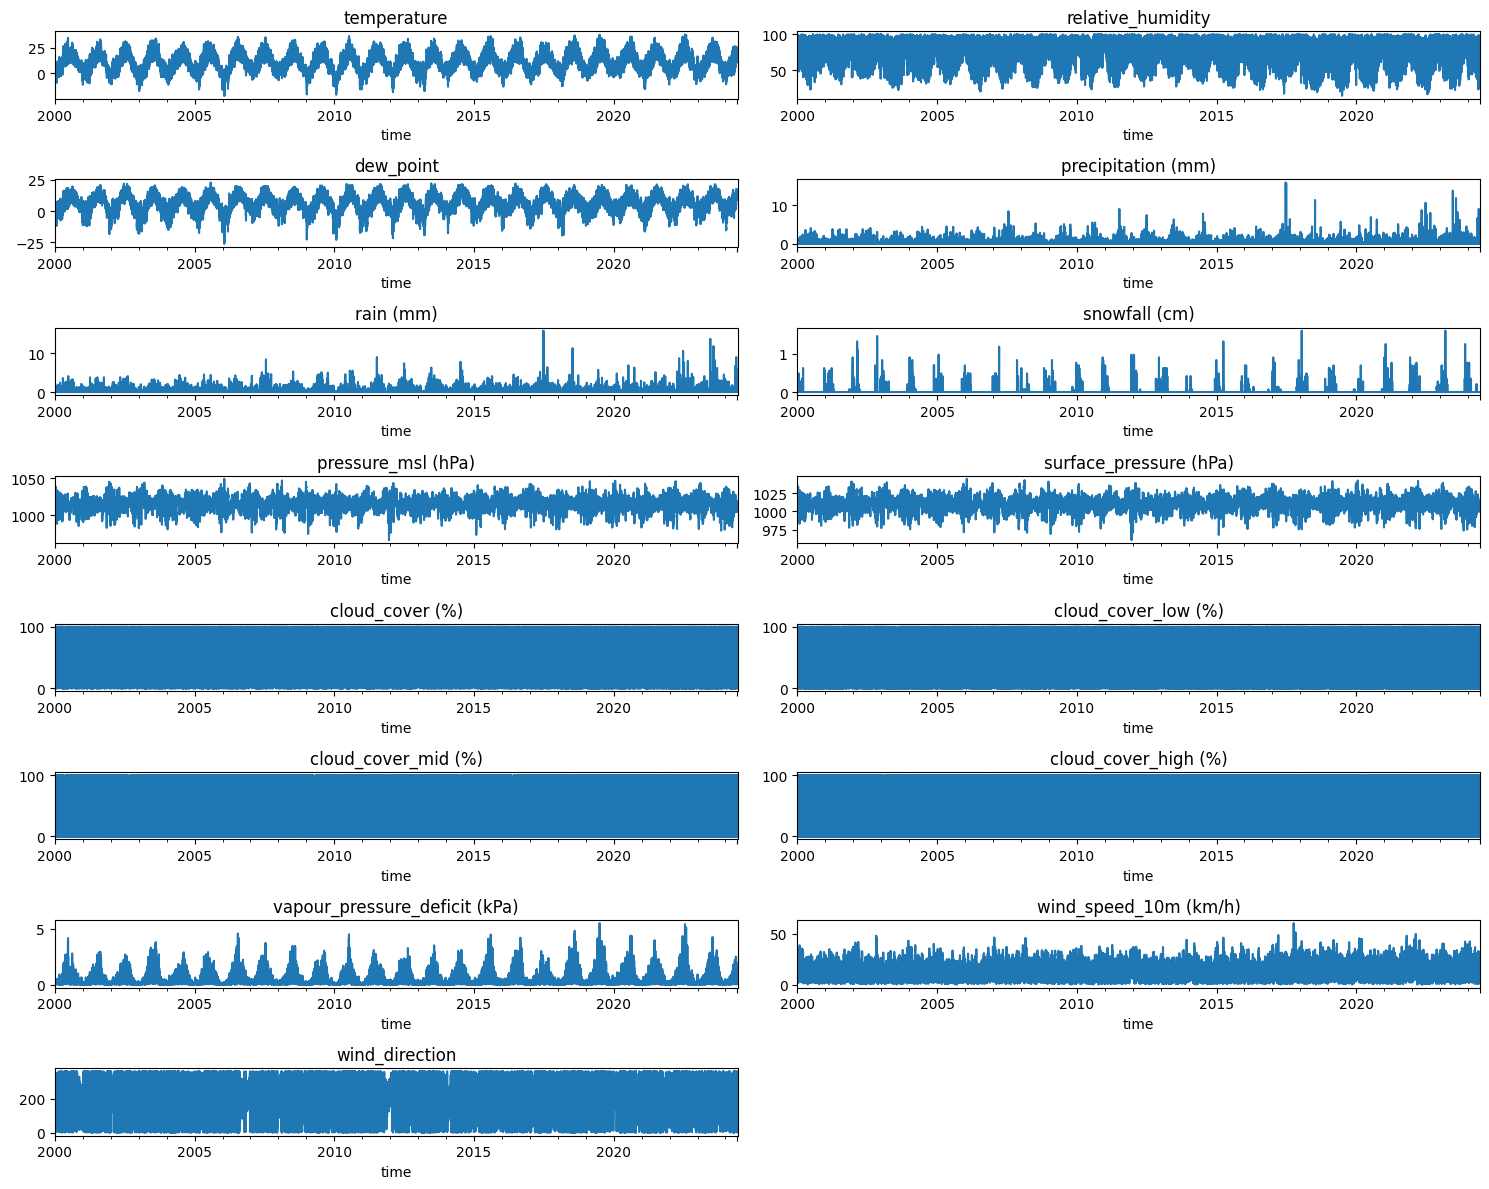

In [11]:
#Visualize the dataset
features = ["temperature", "relative_humidity", "dew_point", "precipitation (mm)", "rain (mm)", "snowfall (cm)", "pressure_msl (hPa)", "surface_pressure (hPa)",
            "cloud_cover (%)", "cloud_cover_low (%)", "cloud_cover_mid (%)", "cloud_cover_high (%)", "vapour_pressure_deficit (kPa)", "wind_speed_10m (km/h)",
            "wind_direction"]

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12)) 
axes = axes.flatten()

for i, feature in enumerate(features):
    data[feature].plot(ax=axes[i], title=feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()